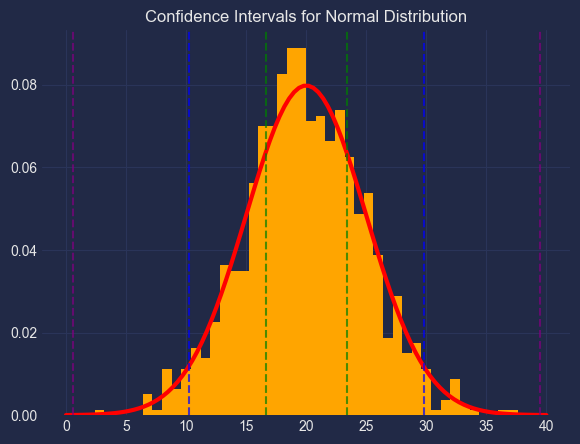

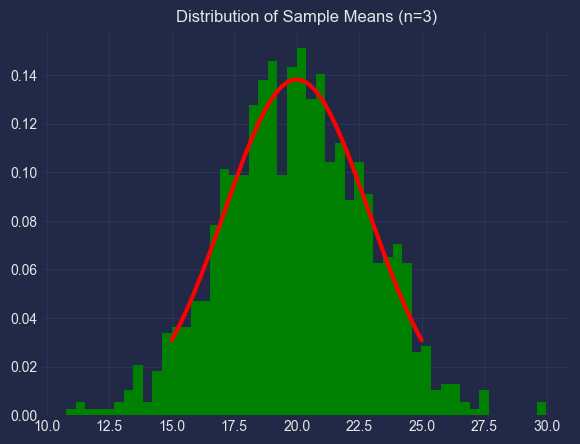

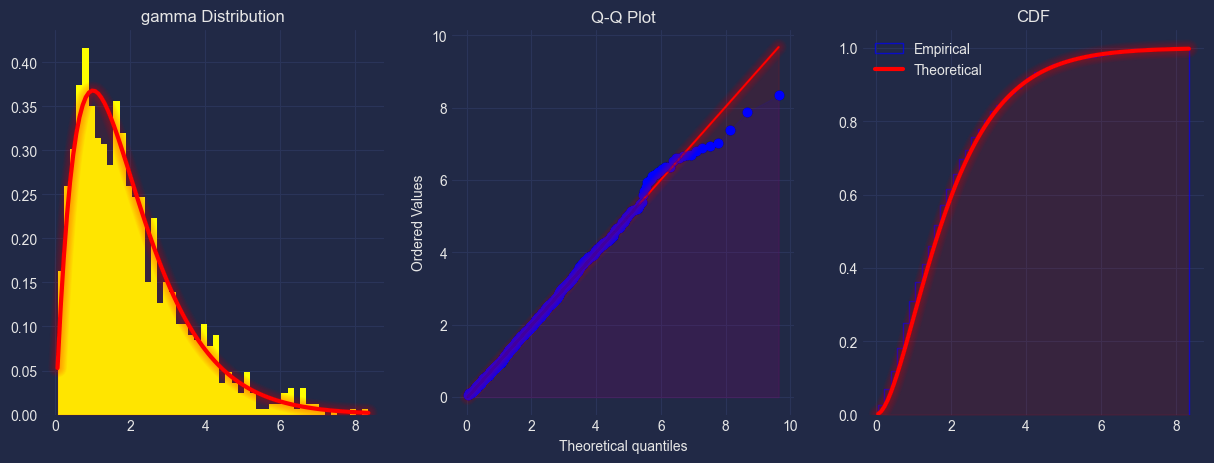

In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")
# Функція для завдання 1
def plot_confidence_intervals():
    values = stats.norm.rvs(loc=20, scale=5, size=1000)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    plt.hist(values, 50, (0, 40), density=True, color="ORANGE")
    
    x = np.linspace(0, 40, 100)
    plt.plot(x, stats.norm.pdf(x, loc=20, scale=5), 'r-', lw=3)
    
    confidence_intervals = [0.5, 0.95, 0.9999]
    colors = ['green', 'blue', 'purple']
    
    for ci, color in zip(confidence_intervals, colors):
        z_score = stats.norm.ppf((1 + ci) / 2)
        interval_values = [20 - z_score * 5, 20 + z_score * 5]
        plt.axvline(interval_values[0], color=color, linestyle='--', alpha=0.7)
        plt.axvline(interval_values[1], color=color, linestyle='--', alpha=0.7)
    
    plt.title('Confidence Intervals for Normal Distribution')
    
    # Функція для завдання 2
def plot_sample_means():
    sample_means = [np.mean(np.random.normal(loc=20, scale=5, size=3)) for _ in range(1000)]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(122)
    plt.hist(sample_means, 50, density=True, color="GREEN")
    
    x = np.linspace(15, 25, 100)
    plt.plot(x, stats.norm.pdf(x, loc=20, scale=5/np.sqrt(3)), 'r-', lw=3)
    plt.title('Distribution of Sample Means (n=3)')

# Функція для завдання 3
def plot_other_distribution(distribution_name, params):
    distribution = getattr(stats, distribution_name)(*params)
    values = distribution.rvs(size=1000)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.hist(values, 50, density=True, color="YELLOW")
    
    x = np.linspace(min(values), max(values), 100)
    plt.plot(x, distribution.pdf(x), 'r-', lw=3)
    mplcyberpunk.add_glow_effects()
    plt.title(f'{distribution_name} Distribution')
    
    plt.subplot(132)
    stats.probplot(values, dist=distribution, plot=plt)
    mplcyberpunk.add_glow_effects()
    plt.title('Q-Q Plot')
    
    plt.subplot(133)
    plt.hist(values, 50, density=True, cumulative=True, histtype='step', color='b', alpha=0.7, label='Empirical')
    plt.plot(x, distribution.cdf(x), 'r-', lw=3, label='Theoretical')
    plt.legend()
    plt.title('CDF')
    mplcyberpunk.add_glow_effects() 
    plt.show()

# Виклики функцій
plot_confidence_intervals()
plot_sample_means()
plot_other_distribution('gamma', (2, 0, 1))
